<a href="https://colab.research.google.com/github/InGev007/startup_acd/blob/main/lesson%2045/Lesson_45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install adtk pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from adtk.visualization import plot
from pmdarima import auto_arima

In [3]:
df = sm.datasets.sunspots.load_pandas().data
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del df["YEAR"]
df.head()

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0


[<Axes: >]

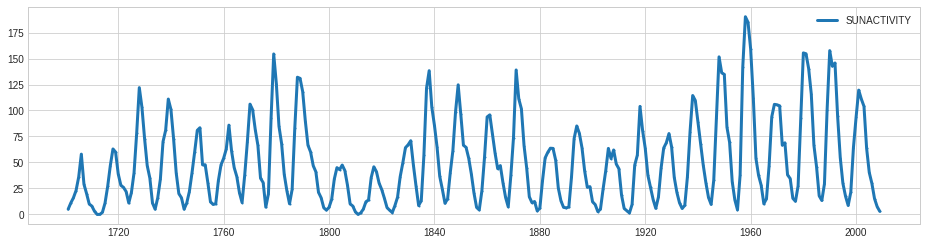

In [4]:
plot(df, ts_linewidth=3)

In [5]:
model = auto_arima(df, seasonal=False, stepwise=True, trace=True)
model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2578.271, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2835.116, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2730.690, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2743.278, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2833.116, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2611.999, Time=0.65 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2575.206, Time=0.71 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2597.162, Time=0.53 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2578.334, Time=2.05 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2574.924, Time=1.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2576.690, Time=1.48 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, T

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [11]:
mod = sm.tsa.statespace.SARIMAX(df, order=(2, 1, 3), seasonal_order=(0, 0, 0, 0))
results = mod.fit()

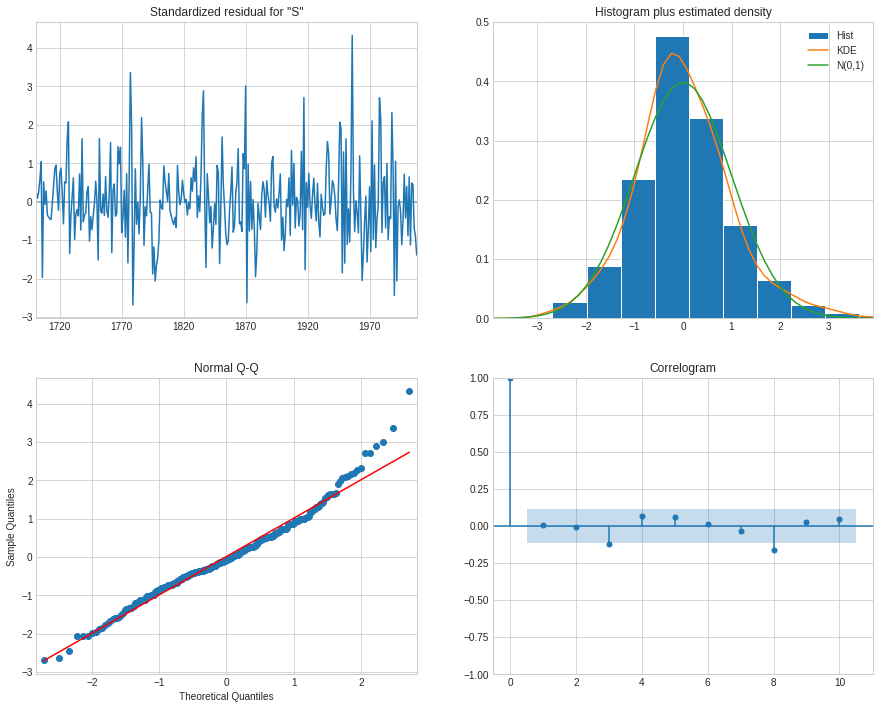

In [7]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

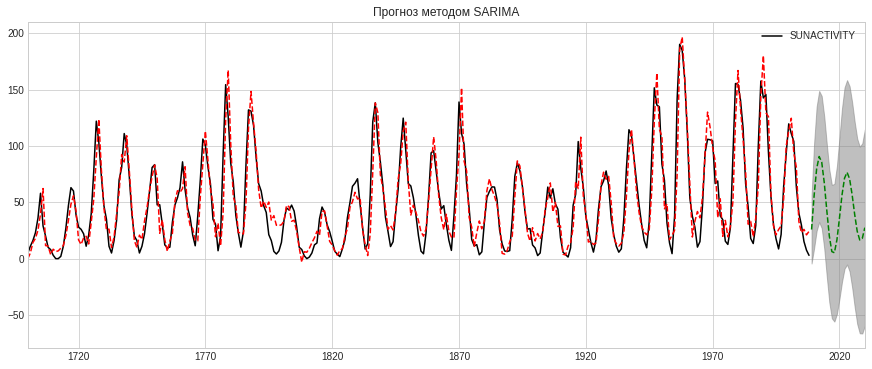

In [8]:
predict=results.get_prediction(start='2009', end='2030')
pred_ci = predict.conf_int()
ax = df.plot(figsize=(15,6), color='black', title="Прогноз методом SARIMA" )
results.fittedvalues.plot(ax=ax, style='--', color='red')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='grey', alpha=.5)
predict.predicted_mean.plot(ax=ax, style='--', color='green')
plt.show()